In [2]:
# Import basic package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load dataset
penguins_size = pd.read_csv('penguins_size.csv')
penguins_size.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
# Checking for missing value
print(penguins_size.isna().sum())


# Calculating drop missing value threshold
th = len(penguins_size) * 0.05
print(th)


# dropping all missing value that less than the threshold value
columns = list(penguins_size.columns)
col_with_missing_value = []


for col in columns:
    if penguins_size[col].isna().sum() > 1:
        col_with_missing_value.append(col)

        
print(col_with_missing_value)


penguins_size = penguins_size.dropna(subset=col_with_missing_value)
print(penguins_size.isna().sum())


penguins_size.head()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64
17.2
['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']
species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


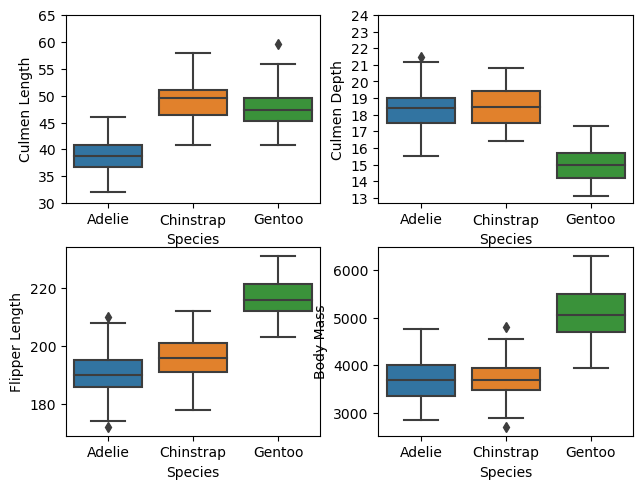

In [4]:
# Checking any outlier
fig, axs = plt.subplots(ncols=2, nrows=2)
fig.tight_layout()
ax1 = sns.boxplot(data=penguins_size,
           x='species',
           y='culmen_length_mm', ax=axs[0,0])
ax1.set(xlabel='Species', ylabel='Culmen Length', yticks=range(30,70,5))

ax2 = sns.boxplot(data=penguins_size,
                 x='species',
                 y='culmen_depth_mm',
                 ax=axs[0,1])
ax2.set(xlabel='Species', ylabel='Culmen Depth', yticks=range(13,25))

ax3 = sns.boxplot(data=penguins_size,
                 x='species',
                 y='flipper_length_mm',
                 ax=axs[1,0])
ax3.set(xlabel='Species', ylabel='Flipper Length')

ax4 = sns.boxplot(data=penguins_size,
                 x='species',
                 y='body_mass_g',
                  ax=axs[1,1])
ax4.set(xlabel='Species', ylabel='Body Mass')
plt.show()

In [5]:
# Assigning outlier
culmen_length_outlier = penguins_size['culmen_length_mm']>=58
culmen_depth_outlier = penguins_size['culmen_depth_mm']>21


print(culmen_length_outlier)
print(culmen_depth_outlier)


# Selecting data without outlier
df = penguins_size[~culmen_length_outlier]
df = df[~culmen_depth_outlier]
print(len(penguins_size))
print(len(df))

0      False
1      False
2      False
4      False
5      False
       ...  
338    False
340    False
341    False
342    False
343    False
Name: culmen_length_mm, Length: 334, dtype: bool
0      False
1      False
2      False
4      False
5      False
       ...  
338    False
340    False
341    False
342    False
343    False
Name: culmen_depth_mm, Length: 334, dtype: bool
334
326


C:\Users\12\AppData\Local\Temp\ipykernel_9008\3566479345.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~culmen_depth_outlier]


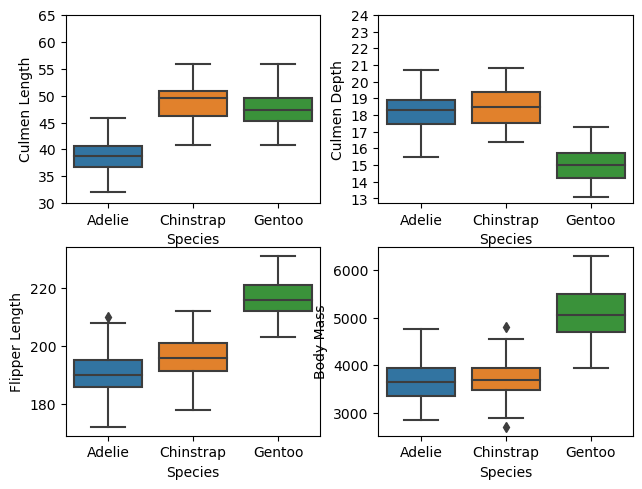

In [6]:
# Visualizing the new DataFrame
fig, axs = plt.subplots(ncols=2, nrows=2)
fig.tight_layout()
ax1 = sns.boxplot(data=df,
           x='species',
           y='culmen_length_mm', ax=axs[0,0])
ax1.set(xlabel='Species', ylabel='Culmen Length', yticks=range(30,70,5))

ax2 = sns.boxplot(data=df,
                 x='species',
                 y='culmen_depth_mm',
                 ax=axs[0,1])
ax2.set(xlabel='Species', ylabel='Culmen Depth', yticks=range(13,25))

ax3 = sns.boxplot(data=df,
                 x='species',
                 y='flipper_length_mm',
                 ax=axs[1,0])
ax3.set(xlabel='Species', ylabel='Flipper Length')

ax4 = sns.boxplot(data=df,
                 x='species',
                 y='body_mass_g',
                 ax=axs[1,1])
ax4.set(xlabel='Species', ylabel='Body Mass')
plt.show()

In [7]:
# Describing the data
df.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,326,326,326.000000,326.000000,326.000000,326.000000,326
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,FEMALE
freq,140,162,NaN,NaN,NaN,NaN,164
mean,NaN,NaN,43.970859,17.084663,201.113497,4205.444785,NaN
std,NaN,NaN,5.359332,1.912922,14.023146,807.283594,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.500000,15.525000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.700000,17.300000,197.000000,4000.000000,NaN
75%,NaN,NaN,48.575000,18.600000,213.000000,4800.000000,NaN


In [8]:
# There is 3 unique value for sex, let's fix it
print(df['sex'].unique())


unusual_value = df['sex'] == '.'
df = df[~unusual_value]
df.describe(include='all')

['MALE' 'FEMALE' '.']


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,325,325,325.000000,325.000000,325.000000,325.000000,325
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,FEMALE
freq,140,161,NaN,NaN,NaN,NaN,164
mean,NaN,NaN,43.969231,17.088923,201.064615,4203.384615,NaN
std,NaN,NaN,5.367516,1.914322,14.016926,807.669691,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.500000,15.500000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.900000,17.300000,197.000000,4000.000000,NaN
75%,NaN,NaN,48.600000,18.600000,213.000000,4800.000000,NaN


In [9]:
# Preparing categorical variable for modeling
df = pd.get_dummies(df, columns=['island','sex'], drop_first=True)
df.head()


# Assigning label for species
df['species_map'] = df['species'].map({'Adelie':0, 'Chinstrap':1, 'Gentoo':2})
df.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE,species_map
0,Adelie,39.1,18.7,181.0,3750.0,False,True,True,0
1,Adelie,39.5,17.4,186.0,3800.0,False,True,False,0
2,Adelie,40.3,18.0,195.0,3250.0,False,True,False,0
4,Adelie,36.7,19.3,193.0,3450.0,False,True,False,0
5,Adelie,39.3,20.6,190.0,3650.0,False,True,True,0


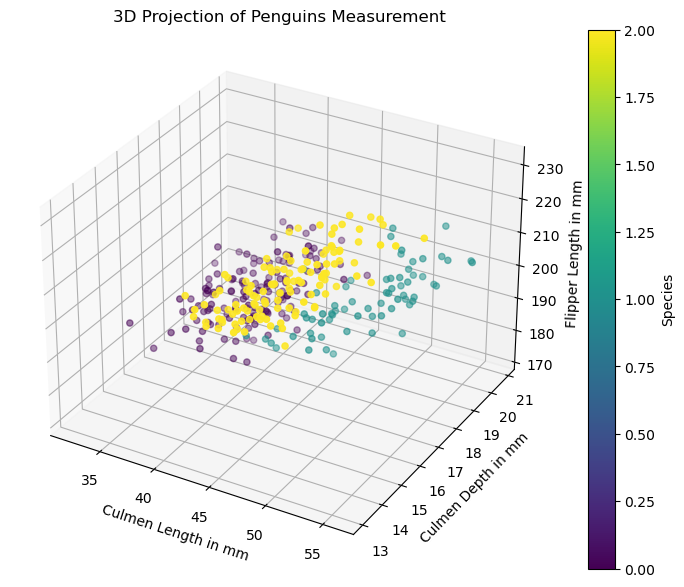

In [12]:
# Visualizing the penguins measurement
x = df.culmen_length_mm
y = df.culmen_depth_mm
z = df.flipper_length_mm

fig = plt.figure(figsize=(10,7))
axs = fig.add_subplot(111, projection = '3d')
scatter = axs.scatter(x,y,z, c=df['species_map'], cmap='viridis', marker='o')
axs.set_xlabel('Culmen Length in mm')
axs.set_ylabel('Culmen Depth in mm')
axs.set_zlabel('Flipper Length in mm')
axs.set_title('3D Projection of Penguins Measurement')
cbar = plt.colorbar(scatter)
cbar.set_label('Species')
plt.savefig('3d_projection_of_penguins_measurement.png')